# Phases

Expected phases models(values expressed in radiants):
$$ \phi_R = \arctan{\frac{1 - \omega^2 L C}{R \omega C}}$$
$$ \phi_R = \arctan{\frac{1 - \omega^2 L C}{R \omega C}} + \frac{\pi}{2}$$
$$ \phi_R = \arctan{\frac{1 - \omega^2 L C}{R \omega C}} - \frac{\pi}{2}$$

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt

from lmfit import Model

In [46]:
file_folder = 'data/actual data/Frequency response/'
file_name = 'phases1.csv'
data_file = file_folder + file_name
x,phaseF,phaseR,phaseL,phaseC  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0,1,2,3,4), unpack = True)
#x corresponds to the frequency

R

[[Model]]
    Model(R_phase_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 20
    # data points      = 986
    # variables        = 3
    chi-square         = 15011.5294
    reduced chi-square = 15.2711388
    Akaike info crit   = 2690.79662
    Bayesian info crit = 2705.47758
[[Variables]]
    R:  2958.80142 +/- 29221.4556 (987.61%) (init = 1500)
    L:  0.03137323 +/- 0.54931941 (1750.92%) (init = 0.04741)
    C:  1.0310e-09 +/- 1.8027e-08 (1748.54%) (init = 1.46e-09)
[[Correlations]] (unreported correlations are < 0.100)
    C(L, C) = -1.000
    C(R, C) = -1.000
    C(R, L) = 1.000
L

[[Model]]
    Model(L_phase_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 986
    # variables        = 3
    chi-square         = 31.7621849
    reduced chi-square = 0.03231148
    Akaike info crit   = -3381.28461
    Bayesian info crit = -3366.60364
[[Variables]]
    R:  2094.85099 +/- 29346.5675 

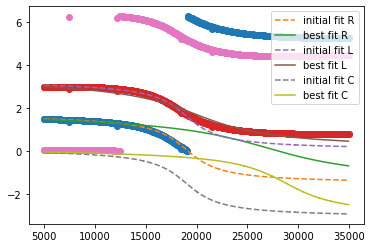

In [47]:
from lmfit import Parameters

paramsF = Parameters()
paramsR = Parameters()
paramsL = Parameters()
paramsC = Parameters()

paramsF.add('phi_f',6.28, min=0,max=6.3)

paramsR.add('R', min=1.5e03, max=3e03)
paramsR.add('L', 4.741e-02, min=3.0e-02, max=5.5e-02)
paramsR.add('C', 1.46e-09, min=1e-09, max=2e-09)

paramsL.add('R', min=1.5e03, max=3e03)
paramsL.add('L', 4.741e-02, min=3.0e-02, max=5.5e-02)
paramsL.add('C', 1.46e-09, min=1e-09, max=2e-09)

paramsC.add('R', min=1.5e03, max=3e03)
paramsC.add('L', 4.741e-02, min=3.0e-02, max=5.5e-02)
paramsC.add('C', 1.46e-09, min=1e-09, max=2e-09)

def F_phase_model(x,phi_F):
    return phi_F

def R_phase_model(x, R, L, C):
    num = 1 - (2 * np.pi * x)**2 * L * C
    den = R * (2 * np.pi * x) * C
    return np.arctan(num / den)


def L_phase_model(x, R, L, C):
    num = 1 - (2 * np.pi * x)**2 * L * C
    den = R * (2 * np.pi * x) * C
    return np.arctan(num / den) + np.pi/2

def C_phase_model(x, R, L, C):
    num = 1 - (2 * np.pi * x)**2 * L * C
    den = R * (2 * np.pi * x) * C
    return np.arctan(num / den) - np.pi/2


Fmodel = Model(F_phase_model)
Rmodel = Model(R_phase_model)
Lmodel = Model(L_phase_model)
Cmodel = Model(C_phase_model)

# resultF = Fmodel.fit(phaseF,x=x,params=paramsF)
resultR = Rmodel.fit(phaseR, x=x, params=paramsR)
resultL = Lmodel.fit(phaseL, x=x, params=paramsL)
resultC = Cmodel.fit(phaseC, x=x, params=paramsC)

# print('F\n')
# print(resultF.fit_report())
print('R\n')
print(resultR.fit_report())
print('L\n')
print(resultL.fit_report())
print('C\n')
print(resultC.fit_report())
# plt.plot(x, phaseF, 'o')
# plt.plot(x, resultF.init_fit, '--', label='initial fit F')
# plt.plot(x, resultF.best_fit, '-', label='best fit F')
plt.plot(x, phaseR, 'o')
plt.plot(x, resultR.init_fit, '--', label='initial fit R')
plt.plot(x, resultR.best_fit, '-', label='best fit R')
plt.plot(x, phaseL, 'o')
plt.plot(x, resultL.init_fit, '--', label='initial fit L')
plt.plot(x, resultL.best_fit, '-', label='best fit L')
plt.plot(x, phaseC, 'o')
plt.plot(x, resultC.init_fit, '--', label='initial fit C')
plt.plot(x, resultC.best_fit, '-', label='best fit C')
plt.legend()

plt.savefig('figs/phases.pdf')
plt.show()